### Viewing and Structuring the Data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [2]:
img_md_subset = pd.read_csv('../data/ecotaxa_export_3857_20201203_2323.tsv', sep='\t')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (265) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
img_md_subset['object_equiv_diameter'].head()

0    74.7461
1    81.0157
2    45.3743
3    51.1020
4    59.7615
Name: object_equiv_diameter, dtype: float64

In [4]:
cols_for_training = [
#'object_equiv_diameter',
'object_peak_fluorescence',
#'object_area',
#'object_area_over_perimeter',
#'object_biovolume',
#'object_bounding_box_xwidth',
#'object_bounding_box_ywidth',
#'object_major_axis_length',
#'object_minor_axis_length',
#'object_num_blobs',
#'object_peak_fluorescence',
'object_peak_scattering',
#'object_perimeter',
#'object_pmt_fluorescence',
#'object_pmt_scattering',
#'object_texture_average_contrast',
#'object_texture_average_gray_level',
#'object_texture_smoothness',
#'object_texture_uniformity',
]

In [5]:
cols_not_for_training = ['img_file_name',
'object_id',
'object_link',
'object_lat',
'object_lon',
'object_date',
'object_time',
'object_depth_min',
'object_depth_max',
'object_annotation_category',
'object_annotation_date',
'object_annotation_hierarchy',
'object_annotation_hierarchy.1',
'object_annotation_person_email',
'object_annotation_person_name',
'object_annotation_status',
'object_annotation_time',
'object_score',
'acq_id',
'acq_instrument',
'acq_resolution_pixels_per_micron',
'process_id',
'process_soft',
'process_soft_version',
'process_script',
'process_script_version',
'process_library',
'process_library_version',
'process_date',
'process_time',
'sample_id',
'sample_source',
'sample_flag',
'sample_cruise',
'sample_vessel',
'sample_reference',
'sample_station',
'sample_cast',
'sample_source_id',
'sample_culture_species',
'sample_concentration',
'sample_dataportal_descriptor',                        
'object_roi_number',
'Unnamed: 0',
'index',
'merged_category',
'level_0']

### somewhat merged categories

In [6]:
# Diatoms: 

## Pennate Diatoms:
amphiprora = ['Amphiprora']                    
banquisia_belgicae = ['Banquisia belgicae']
cylindrotheca = ['Cylindrotheca']                 
licmophora = ['Licmophora']
nitzschia_frigida = ['Nitzschia frigida']             
pseudo_nitzschia_chain = ['Pseudo-Nitzschia chain'] 

unidentified_single_pennate = [
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
chaetoceros_mediophyceae = ['Chaetoceros<Mediophyceae']
chaetoceros_single = ['Chaetoceros single']
corethron = ['Corethron']
eucampia_chain = ['Eucampia chain']
eucampia = ['Eucampia']
dactyliosolen = ['Dactyliosolen']
odontella = ['Odontella sp.']
proboscia = ['Proboscia sp.']
rhizosolenia = ['Rhizosolenia']
unidentified_single_centric = [
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

# Dinoflagellates: 
gyrodinium = ['Gyrodinium']
gymnodinium = ['Gymnodinium'] 
katodinium = ['Katodinium']
warnowia = ['Warnowia']
dinoflagellate_i = ['dinoflagellate-i']
dinoflagellate_ii = ['dinoflagellate-ii']
dinoflagellate_iii = ['dinoflagellate-iii']

dinophyceae = ['Dinophyceae']

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [7]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [8]:
all_classes_sep = amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [9]:
list(set(all_classes) - set(all_classes_sep))

[]

In [10]:
list(set(all_classes_sep) - set(all_classes))

[]

In [11]:
class_str = 'amphiprora+banquisia_belgicae+cylindrotheca+licmophora+nitzschia_frigida+pseudo_nitzschia_chain+unidentified_single_pennate+chaetoceros_mediophyceae+chaetoceros_single+corethron+eucampia_chain+eucampia+dactyliosolen+odontella +proboscia+rhizosolenia +unidentified_single_centric+cryptophyta+gyrodinium+gymnodinium+katodinium+warnowia+dinoflagellate_i+dinoflagellate_ii +dinoflagellate_iii+dinophyceae+pyramimonas +phaeocystis+dictyochales +ciliophora +tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [12]:
class_str.replace('+', "','")

"amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [13]:
classes = [amphiprora,banquisia_belgicae,cylindrotheca,licmophora,nitzschia_frigida,pseudo_nitzschia_chain,unidentified_single_pennate,chaetoceros_mediophyceae,chaetoceros_single,corethron,eucampia_chain,eucampia,dactyliosolen,odontella ,proboscia,rhizosolenia ,unidentified_single_centric,cryptophyta,gyrodinium,gymnodinium,katodinium,warnowia,dinoflagellate_i,dinoflagellate_ii ,dinoflagellate_iii,dinophyceae,pyramimonas ,phaeocystis,dictyochales ,ciliophora ,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['amphiprora','banquisia_belgicae','cylindrotheca','licmophora','nitzschia_frigida','pseudo_nitzschia_chain','unidentified_single_pennate','chaetoceros_mediophyceae','chaetoceros_single','corethron','eucampia_chain','eucampia','dactyliosolen','odontella ','proboscia','rhizosolenia ','unidentified_single_centric','cryptophyta','gyrodinium','gymnodinium','katodinium','warnowia','dinoflagellate_i','dinoflagellate_ii ','dinoflagellate_iii','dinophyceae','pyramimonas ','phaeocystis','dictyochales ','ciliophora ','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


### super merged categories

In [14]:
# Diatoms: 

## Pennate Diatoms:
pennates = [
    'Amphiprora',                    
    'Banquisia belgicae',
    'Cylindrotheca'  ,             
    'Licmophora',
    'Nitzschia frigida'  ,        
    'Pseudo-Nitzschia chain',
    'Membraneis',
    'Navicula',
    'temp cylindrotheca',
    'pennate 1 temp',
    'pennate 2 temp',
    'pennate 7 temp',
    'pennate 10 temp',
    'pennate 11 temp',
    'chain<pennate',
    'pennate<Bacillariophyta'
]

## Centric Diatoms
centrics = [
    'Chaetoceros<Mediophyceae',
    'Chaetoceros single',
    'Corethron',
    'Eucampia chain',
    'Eucampia',
    'Dactyliosolen',
    'Odontella sp.',
    'Proboscia sp.',
    'Rhizosolenia',
    'centric 1 temp',
    'centric 2 temp',
    'centric 3 temp',
    'centric 4 temp',
    'centric 6 temp',
    'centric',
    'chain<centric'
]

# Cryptophytes: 
cryptophyta = ['Cryptophyta']

dinoflagellates = [
    'Gyrodinium',
    'Gymnodinium',
    'Katodinium',
    'Warnowia',
    'dinoflagellate-i',
    'dinoflagellate-ii',
    'dinoflagellate-iii',
    'Dinophyceae'
]

# Prasinophytes/Chlorophytes:
pyramimonas = ['Pyramimonas']

# Haptophytes/Prymnesiophyte:
phaeocystis = ['Phaeocystis']

# Silicoflagellates:
dictyochales = ['Dictyochales']

# Microzooplankton: 
ciliophora = ['Ciliophora']
tintinnida = ['Tintinnida']

unidentified_flagellates = [ 
    't002',
    't005',
    't007',
    't009',
    't012',
    't013',
    't020'
]

unidentified_living_cells = [ 
    't006',
    't019'
]

other = [ 
    'bead',
    'bubble',
    'detritus',
    'badfocus<artefact',
    'multiple<other'
]

In [15]:
all_classes = list(img_md_subset.groupby('object_annotation_category')['object_id'].nunique().index)

In [16]:
all_classes_sep = pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other
len(all_classes), len(all_classes_sep)

(60, 60)

In [17]:
list(set(all_classes) - set(all_classes_sep))

[]

In [18]:
list(set(all_classes_sep) - set(all_classes))

[]

In [19]:
class_str = 'pennates+centrics+cryptophyta+dinoflagellates+pyramimonas+phaeocystis+dictyochales+ciliophora+tintinnida+unidentified_flagellates+unidentified_living_cells+other'
class_str.replace('+', ',')

'pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other'

In [20]:
class_str.replace('+', "','")

"pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other"

### adding all the merged classes into the dataframe

In [21]:
classes = [pennates,centrics,cryptophyta,dinoflagellates,pyramimonas,phaeocystis,dictyochales,ciliophora,tintinnida,unidentified_flagellates,unidentified_living_cells,other]

class_names = ['pennates','centrics','cryptophyta','dinoflagellates','pyramimonas','phaeocystis','dictyochales','ciliophora','tintinnida','unidentified_flagellates','unidentified_living_cells','other']

img_md_subset["merged_category"] = ""
for i in range(len(classes)):
    img_md_subset['merged_category'][img_md_subset['object_annotation_category'].isin(classes[i])] = class_names[i]

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
img_md_subset[['object_annotation_category','merged_category']]

,object_annotation_category,merged_category
0,Ciliophora,ciliophora
1,Ciliophora,ciliophora
2,Ciliophora,ciliophora
3,Ciliophora,ciliophora
4,Ciliophora,ciliophora
5,Ciliophora,ciliophora
6,Ciliophora,ciliophora
7,Tintinnida,tintinnida
8,Ciliophora,ciliophora
9,Ciliophora,ciliophora


### For now only using validated images

In [23]:
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

rare_count = 250

unique_validated = img_md_subset[img_md_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

rare_classes = unique_validated[unique_validated <= rare_count]

#val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(rare_classes.index))]
rare_classes

object_annotation_category
Banquisia belgicae          64
Corethron                  116
Dictyochales               167
Dinophyceae                165
Eucampia                   141
Eucampia chain              97
Gyrodinium                 166
Licmophora                 148
Odontella sp.               80
Proboscia sp.              243
Rhizosolenia               140
Tintinnida                  50
Warnowia                    53
centric                    142
pennate<Bacillariophyta     57
t006                        68
t007                       234
t009                       147
t020                       211
Name: object_id, dtype: int64

Filter this data to only use validated and other filters TODO

In [24]:
val_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']
len(val_subset)

25401

#### Getting Images Organized

In [25]:
import glob, os

fn_list = []
for file in glob.glob("../../../Data/all_imagery/*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[26:-4] for x in fn_list]

5806675


Only use data where we have both labels and imagery

In [26]:
val_img_subset = val_subset[val_subset['object_id'].isin(fn_edit)]
len(val_img_subset)

25275

Only use classes with `min_count` or more samples

In [27]:
min_count = 20


unique_validated = val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

val_img_subset = val_img_subset[val_img_subset['object_annotation_category'].isin(list(sufficient_classes.index))]

In [28]:
val_img_subset.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron,merged_category
0,D20170905T132200_IFCB107_00007,43.736,-43.009,20170905,132200,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
1,D20170904T161256_IFCB107_00002,42.387,-42.947,20170904,161256,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
2,D20170904T172259_IFCB107_00004,42.384,-42.931,20170904,172259,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
3,D20170904T183300_IFCB107_00002,42.378,-42.916,20170904,183300,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
4,D20170905T015820_IFCB107_00003,42.371,-42.890,20170905,15820,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora


In [29]:
with pd.option_context('display.max_rows', 200):
    print(val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique())

object_annotation_category
Amphiprora                   491
Banquisia belgicae            64
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                436
Dictyochales                 167
Dinophyceae                  165
Eucampia                     141
Eucampia chain                97
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Licmophora                   148
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Odontella sp.                 80
Phaeocystis                 1020
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  897
Rhizosolenia                 140
Tintinnida                    45
Warnowia                      53
badfocus<artefact           1194
bead            

In [30]:
class_id_list = [[x, i] for i, x in enumerate(list(sufficient_classes.index))]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

class_id_dict

{'Amphiprora': 0,
 'Banquisia belgicae': 1,
 'Chaetoceros single': 2,
 'Chaetoceros<Mediophyceae': 3,
 'Ciliophora': 4,
 'Corethron': 5,
 'Cryptophyta': 6,
 'Cylindrotheca': 7,
 'Dactyliosolen': 8,
 'Dictyochales': 9,
 'Dinophyceae': 10,
 'Eucampia': 11,
 'Eucampia chain': 12,
 'Gymnodinium': 13,
 'Gyrodinium': 14,
 'Katodinium': 15,
 'Licmophora': 16,
 'Membraneis': 17,
 'Navicula': 18,
 'Nitzschia frigida': 19,
 'Odontella sp.': 20,
 'Phaeocystis': 21,
 'Proboscia sp.': 22,
 'Pseudo-Nitzschia chain': 23,
 'Pyramimonas': 24,
 'Rhizosolenia': 25,
 'Tintinnida': 26,
 'Warnowia': 27,
 'badfocus<artefact': 28,
 'bead': 29,
 'bubble': 30,
 'centric': 31,
 'centric 1 temp': 32,
 'centric 2 temp': 33,
 'centric 3 temp': 34,
 'centric 4 temp': 35,
 'centric 6 temp': 36,
 'chain<centric': 37,
 'chain<pennate': 38,
 'detritus': 39,
 'dinoflagellate-i': 40,
 'dinoflagellate-ii': 41,
 'dinoflagellate-iii': 42,
 'multiple<other': 43,
 'pennate 1 temp': 44,
 'pennate 10 temp': 45,
 'pennate 11 temp

In [31]:
buckets = {}
for key in id_class_dict:
    buckets[key] = 0

object_ids = []

max_count = 700

# TODO need to somehow prioritize the undersampled classes first or they might only consist of the highly available ones
# this might be easier if merge them after this step...
for index, row in val_img_subset.iterrows():
    if buckets[class_id_dict[row['object_annotation_category']]] < max_count:
        object_ids.append(row['object_id'])
        buckets[class_id_dict[row['object_annotation_category']]] += 1
len(object_ids)

22873

In [32]:
balanced_df = val_img_subset[val_img_subset['object_id'].isin(object_ids)]
balanced_df.head()

,object_id,object_lat,object_lon,object_date,object_time,object_link,object_depth_min,object_depth_max,object_annotation_status,object_annotation_person_name,...,process_script,process_script_version,process_library,process_library_version,process_date,process_time,acq_id,acq_instrument,acq_resolution_pixels_per_micron,merged_category
0,D20170905T132200_IFCB107_00007,43.736,-43.009,20170905,132200,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
1,D20170904T161256_IFCB107_00002,42.387,-42.947,20170904,161256,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
2,D20170904T172259_IFCB107_00004,42.384,-42.931,20170904,172259,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
3,D20170904T183300_IFCB107_00002,42.378,-42.916,20170904,183300,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora
4,D20170905T015820_IFCB107_00003,42.371,-42.890,20170905,15820,NaN,5.0,5.0,validated,NaN,...,easyIFCB,870c8428659f37e17e280fd213b07c0b1a692b86,ifcb-analysis,e9e37998a8bb8caf587b19418202b650ba0b99f2-durty,20170927,220000,IFCB107,IFCB,3.4,ciliophora


In [33]:
len(balanced_df)

22873

## Run the Model

### Preprocess for Keras

Load all data into memory, may not work at full size

In [34]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [35]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []
object_ids_training = []


for index, row in balanced_df.sample(frac=1).iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    #img = image.load_img(row['full_path'], target_size=(150, 150), color_mode="grayscale")
    img = image.load_img('../../../Data/all_imagery/'+row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    labels.append(class_id_dict[row['object_annotation_category']])
    #merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    #flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']]) 
    # changes this to add all handcrafted features to the data as a vector
    flu_data.append(np.array(row[balanced_df.columns.isin(cols_for_training)].values, dtype=np.float64))
    object_ids_training.append(row['object_id'])
    
images = np.array(images)
labels = np.array(labels)
#merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)
object_ids_training = np.array(object_ids_training)

In [36]:
images.shape, labels.shape, flu_data.shape

((22873, 150, 150, 1), (22873,), (22873, 2))

In [37]:
from tensorflow import keras

from sklearn.model_selection import train_test_split

num_classes = len(class_id_dict)

test_size = 0.20

X_train, X_test, flu_train, flu_test, ids_train, ids_test, y_train, y_test = train_test_split(images, flu_data, object_ids_training, labels, test_size=test_size, random_state=42, stratify=labels)

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

X_train.shape, flu_train.shape, X_test.shape

((18298, 150, 150, 1), (18298, 2), (4575, 150, 150, 1))

### Need to oversample the X_train classes where y_train label is below 500 up to 500 with slight augmentation.

In [38]:
np.unique(np.argmax(y_train, axis=1), return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59]),
 array([393,  51, 236, 560, 324,  93, 560, 354, 349, 134, 132, 113,  78,
        210, 133, 363, 118, 205, 282, 560,  64, 560, 194, 560, 560, 112,
         36,  42, 560, 427, 282, 114, 476, 560, 358, 291, 210, 450, 425,
        560, 282, 560, 216, 442, 369, 427, 457, 474, 463,  46, 446, 390,
         54, 187, 118, 301, 272, 241, 169, 295]))

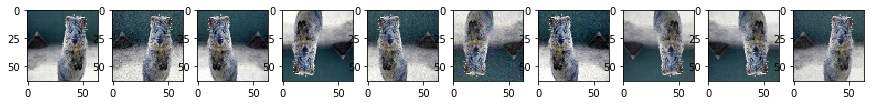

In [39]:
import imgaug as ia
import imgaug.augmenters as iaa


ia.seed(1)

# Example batch of images.
# The array has shape (32, 64, 64, 3) and dtype uint8.
images = np.array(
    [ia.quokka(size=(64, 64)) for _ in range(32)],
    dtype=np.uint8
)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.5),
    #iaa.Crop(percent=(0, 0.1)), # random crops
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    iaa.Sometimes(
        0.1,
        iaa.GaussianBlur(sigma=(0, 0.2))
    ),
    # Strengthen or weaken the contrast in each image.
    iaa.LinearContrast((0.9, 1.1)),
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    #iaa.Affine(
    #    scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
    #    translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
    #    rotate=(-25, 25),
    #    shear=(-8, 8)
    #)
], random_order=True) # apply augmenters in random order

images_aug = seq(images=images)
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i])


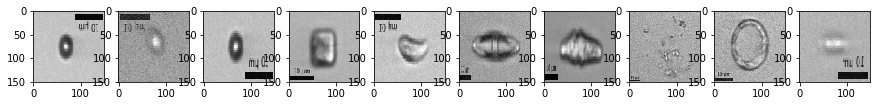

In [40]:
images_aug = seq(images=X_train[:20])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

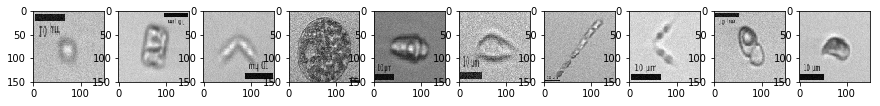

In [41]:
images_aug = seq(images=X_train[1000:1020])
fig, ax = plt.subplots(1,10, figsize=(15,10))
for i in range(10):
    ax[i].imshow(images_aug[i,:,:,0], cmap = 'gray')

In [42]:
import random

y_train_argmax = np.argmax(y_train, axis=1)

#train_count = int((1-test_size) * max_count)
train_count = max_count

# take the image and augment it and add it to a stack and add the label to another stack and the concat them to the main stacks
class_labels, count_of_classes = np.unique(y_train_argmax, return_counts=True)
list_of_all_images = []
list_of_all_flu_data = []
list_of_all_labs = []
for l, c in enumerate(count_of_classes):
    #print(l)
    list_of_class_images = []
    list_of_class_labs = []
    list_of_class_flu_data = []
    if c < train_count:
        num_to_aug = train_count - c
        all_im_of_class = X_train[y_train_argmax == l]
        all_flu_of_class = flu_train[y_train_argmax == l]
        for i in range(0,num_to_aug):
            im_idx = random.randint(0, all_im_of_class.shape[0]-1)
            im = all_im_of_class[im_idx,:,:,:]
            flu = all_flu_of_class[im_idx,:]
            im = seq(image=im)
            # augmenting the flu data but not sure this is ideal
            flu = flu*random.uniform(0.9, 1.1)
            list_of_class_images.append(im)
            list_of_class_labs.append(l)
            list_of_class_flu_data.append(flu)
    list_of_all_images = list_of_all_images + list_of_class_images
    list_of_all_labs = list_of_all_labs + list_of_class_labs
    list_of_all_flu_data = list_of_all_flu_data + list_of_class_flu_data

In [43]:
list_of_all_labs = np.array(list_of_all_labs)
one_hot = np.zeros((list_of_all_labs.size, list_of_all_labs.max()+1))
one_hot[np.arange(list_of_all_labs.size),list_of_all_labs] = 1
y_train.shape, one_hot.shape

((18298, 60), (23702, 60))

In [44]:
# add these new images into the training data
X_train = np.concatenate((X_train, np.array(list_of_all_images)), axis=0)
y_train = np.concatenate((y_train, one_hot))

In [45]:
list_of_all_flu_data = np.array(list_of_all_flu_data)
flu_train = np.concatenate((flu_train, list_of_all_flu_data), axis=0)

In [46]:
X_train.shape, flu_train.shape, y_train.shape

((42000, 150, 150, 1), (42000, 2), (42000, 60))

### Must normalize the data or training results are erratic!

In [47]:
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(132.38892, 39.716736, 132.25874, 40.310154)

In [48]:
#np.mean(flu_train[:,0]), np.std(flu_train[:,0])

In [49]:
# replace nan values with mean values from each column

In [50]:
#Obtain mean of columns as you need, nanmean is convenient.
col_mean = np.nanmean(flu_train, axis=0)

#Find indices that you need to replace
inds = np.where(np.isnan(flu_train))

#Place column means in the indices. Align the arrays using take
flu_train[inds] = np.take(col_mean, inds[1])

In [51]:
# scale the train and test flu data
# TODO need to save this fit scaler out to reuse
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(flu_train)
flu_train = scaler.transform(flu_train)
flu_test = scaler.transform(flu_test)

In [52]:
feat_ind = 0
np.min(flu_train[:,feat_ind]), np.max(flu_train[:,feat_ind]), \
    np.mean(flu_train[:,feat_ind]), np.std(flu_train[:,feat_ind])

(-0.6643496350664112,
 3.899961598821546,
 9.622778764293928e-16,
 0.9999999999999986)

In [53]:
np.min(flu_test[:,feat_ind]), np.max(flu_test[:,feat_ind]), \
    np.mean(flu_test[:,feat_ind]), np.std(flu_test[:,feat_ind])

(-0.6622651135908678,
 3.497755951674172,
 -0.1495122493496553,
 0.8754664621130174)

In [54]:
X_train = X_train / 130
X_test = X_test / 130
np.mean(X_train), np.std(X_train), np.mean(X_test), np.std(X_test)

(1.0183686, 0.30551037, 1.0173756, 0.3100782)

In [55]:
np.unique(y_train, return_counts=True), np.unique(y_test, return_counts=True)

((array([0., 1.]), array([2478000,   42000])),
 (array([0., 1.], dtype=float32), array([269925,   4575])))

#### shuffle input data

In [56]:
from sklearn.utils import shuffle
X_train, flu_train, y_train = shuffle(X_train, flu_train, y_train)

In [57]:
input_shape = X_train.shape[1:]
flu_input_shape = flu_train.shape[1:]
batch_size = 40

epochs = 100

input_shape, flu_input_shape

((150, 150, 1), (2,))

In [58]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Input, Concatenate, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint

### Medium Complexity Model

In [61]:
inputs = Input(shape=input_shape)
input_flu = Input(shape=flu_input_shape)

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

# switch to functional and concat the other features here before the dense layer

x = Flatten()(x)
x = Concatenate(axis=-1)([x, input_flu])
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model([inputs,input_flu], output)

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 150, 150, 1)  0                                            
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 150, 150, 32) 320         input_3[0][0]                    
__________________________________________________________________________________________________
conv2d_9 (Conv2D)               (None, 148, 148, 32) 9248        conv2d_8[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 74, 74, 32)   0           conv2d_9[0][0]                   
__________________________________________________________________________________________________
dropout_5 

In [62]:
checkpoint = ModelCheckpoint('../model_weights_all_classes_flu_iteration10.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


# Fit the model on the batches generated by datagen.flow().
model.compile(loss=keras.losses.categorical_crossentropy,
          optimizer=keras.optimizers.Adadelta(),
          metrics=['accuracy'])

history = model.fit(x=[X_train, flu_train], y=y_train, 
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=([X_test,flu_test], y_test),
                    callbacks=callbacks_list)

# history = model.fit(x=[X_train], y=y_train, 
#                     batch_size=batch_size,
#                     epochs=epochs,
#                     verbose=1,
#                     validation_data=([X_test], y_test),
#                     callbacks=callbacks_list)

Train on 42000 samples, validate on 4575 samples
Epoch 1/100
41960/42000 [============================>.] - ETA: 0s - loss: 2.7411 - acc: 0.2724
Epoch 00001: val_acc improved from -inf to 0.70885, saving model to ../model_weights_all_classes_flu_iteration10.hdf5
42000/42000 [==============================] - 45s 1ms/step - loss: 2.7394 - acc: 0.2728 - val_loss: 1.0398 - val_acc: 0.7089
Epoch 2/100
41960/42000 [============================>.] - ETA: 0s - loss: 1.1129 - acc: 0.6759
Epoch 00002: val_acc improved from 0.70885 to 0.80699, saving model to ../model_weights_all_classes_flu_iteration10.hdf5
42000/42000 [==============================] - 45s 1ms/step - loss: 1.1129 - acc: 0.6759 - val_loss: 0.7166 - val_acc: 0.8070
Epoch 3/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.7612 - acc: 0.7740
Epoch 00003: val_acc improved from 0.80699 to 0.83082, saving model to ../model_weights_all_classes_flu_iteration10.hdf5
42000/42000 [==============================] - 45s 

Epoch 28/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.1682 - acc: 0.9497
Epoch 00028: val_acc did not improve from 0.89858
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1681 - acc: 0.9498 - val_loss: 0.5062 - val_acc: 0.8979
Epoch 29/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.1691 - acc: 0.9506
Epoch 00029: val_acc did not improve from 0.89858
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1693 - acc: 0.9505 - val_loss: 0.5371 - val_acc: 0.8833
Epoch 30/100
41960/42000 [============================>.] - ETA: 0s - loss: 0.1689 - acc: 0.9503
Epoch 00030: val_acc did not improve from 0.89858
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1690 - acc: 0.9504 - val_loss: 0.6383 - val_acc: 0.8839
Epoch 31/100
41960/42000 [============================>.] - ETA: 0s - loss: 0.1609 - acc: 0.9526
Epoch 00031: val_acc did not improve from 0.89858
42000/42000 [=====================

41960/42000 [============================>.] - ETA: 0s - loss: 0.1625 - acc: 0.9546
Epoch 00057: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1627 - acc: 0.9546 - val_loss: 0.5063 - val_acc: 0.8905
Epoch 58/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.1724 - acc: 0.9538
Epoch 00058: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1724 - acc: 0.9538 - val_loss: 0.5094 - val_acc: 0.8957
Epoch 59/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.1724 - acc: 0.9546
Epoch 00059: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1727 - acc: 0.9545 - val_loss: 0.4978 - val_acc: 0.8931
Epoch 60/100
41920/42000 [============================>.] - ETA: 0s - loss: 0.1704 - acc: 0.9545
Epoch 00060: val_acc did not improve from 0.90295
42000/42000 [==============================] - 

41960/42000 [============================>.] - ETA: 0s - loss: 0.1917 - acc: 0.9505
Epoch 00087: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1917 - acc: 0.9504 - val_loss: 0.5789 - val_acc: 0.8909
Epoch 88/100
41960/42000 [============================>.] - ETA: 0s - loss: 0.1882 - acc: 0.9521
Epoch 00088: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1884 - acc: 0.9521 - val_loss: 0.5635 - val_acc: 0.8715
Epoch 89/100
41960/42000 [============================>.] - ETA: 0s - loss: 0.1943 - acc: 0.9496
Epoch 00089: val_acc did not improve from 0.90295
42000/42000 [==============================] - 45s 1ms/step - loss: 0.1942 - acc: 0.9496 - val_loss: 0.5643 - val_acc: 0.8828
Epoch 90/100
41960/42000 [============================>.] - ETA: 0s - loss: 0.1922 - acc: 0.9503
Epoch 00090: val_acc did not improve from 0.90295
42000/42000 [==============================] - 

dict_keys(['val_acc', 'val_loss', 'acc', 'loss'])


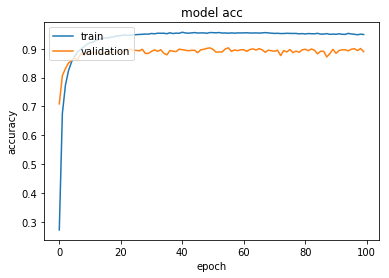

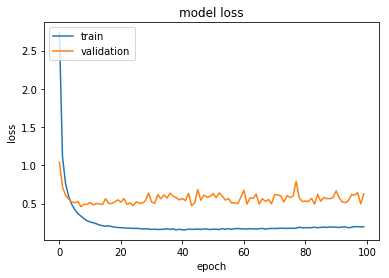

In [63]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_acc")
plt.savefig("../modelacc.png", dpi=300)
plt.show()
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
#experiment.log_figure(figure=plt, figure_name="model_loss")
plt.savefig("../modelloss.png", dpi=300)
plt.show()

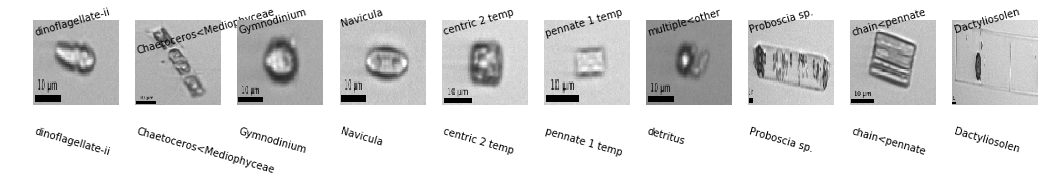

In [64]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

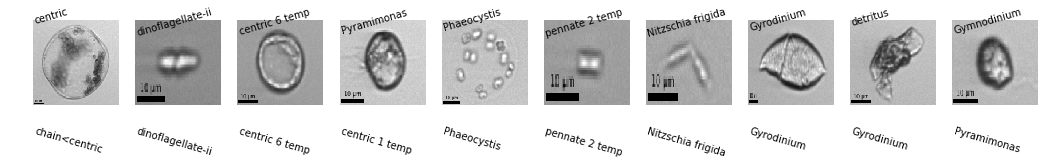

In [65]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [66]:
predictions = np.argmax(model.predict([X_test, flu_test]), axis=1)
labs = np.argmax(y_test, axis=1)

Text(0.5, 331.09999999999985, 'Predicted label')

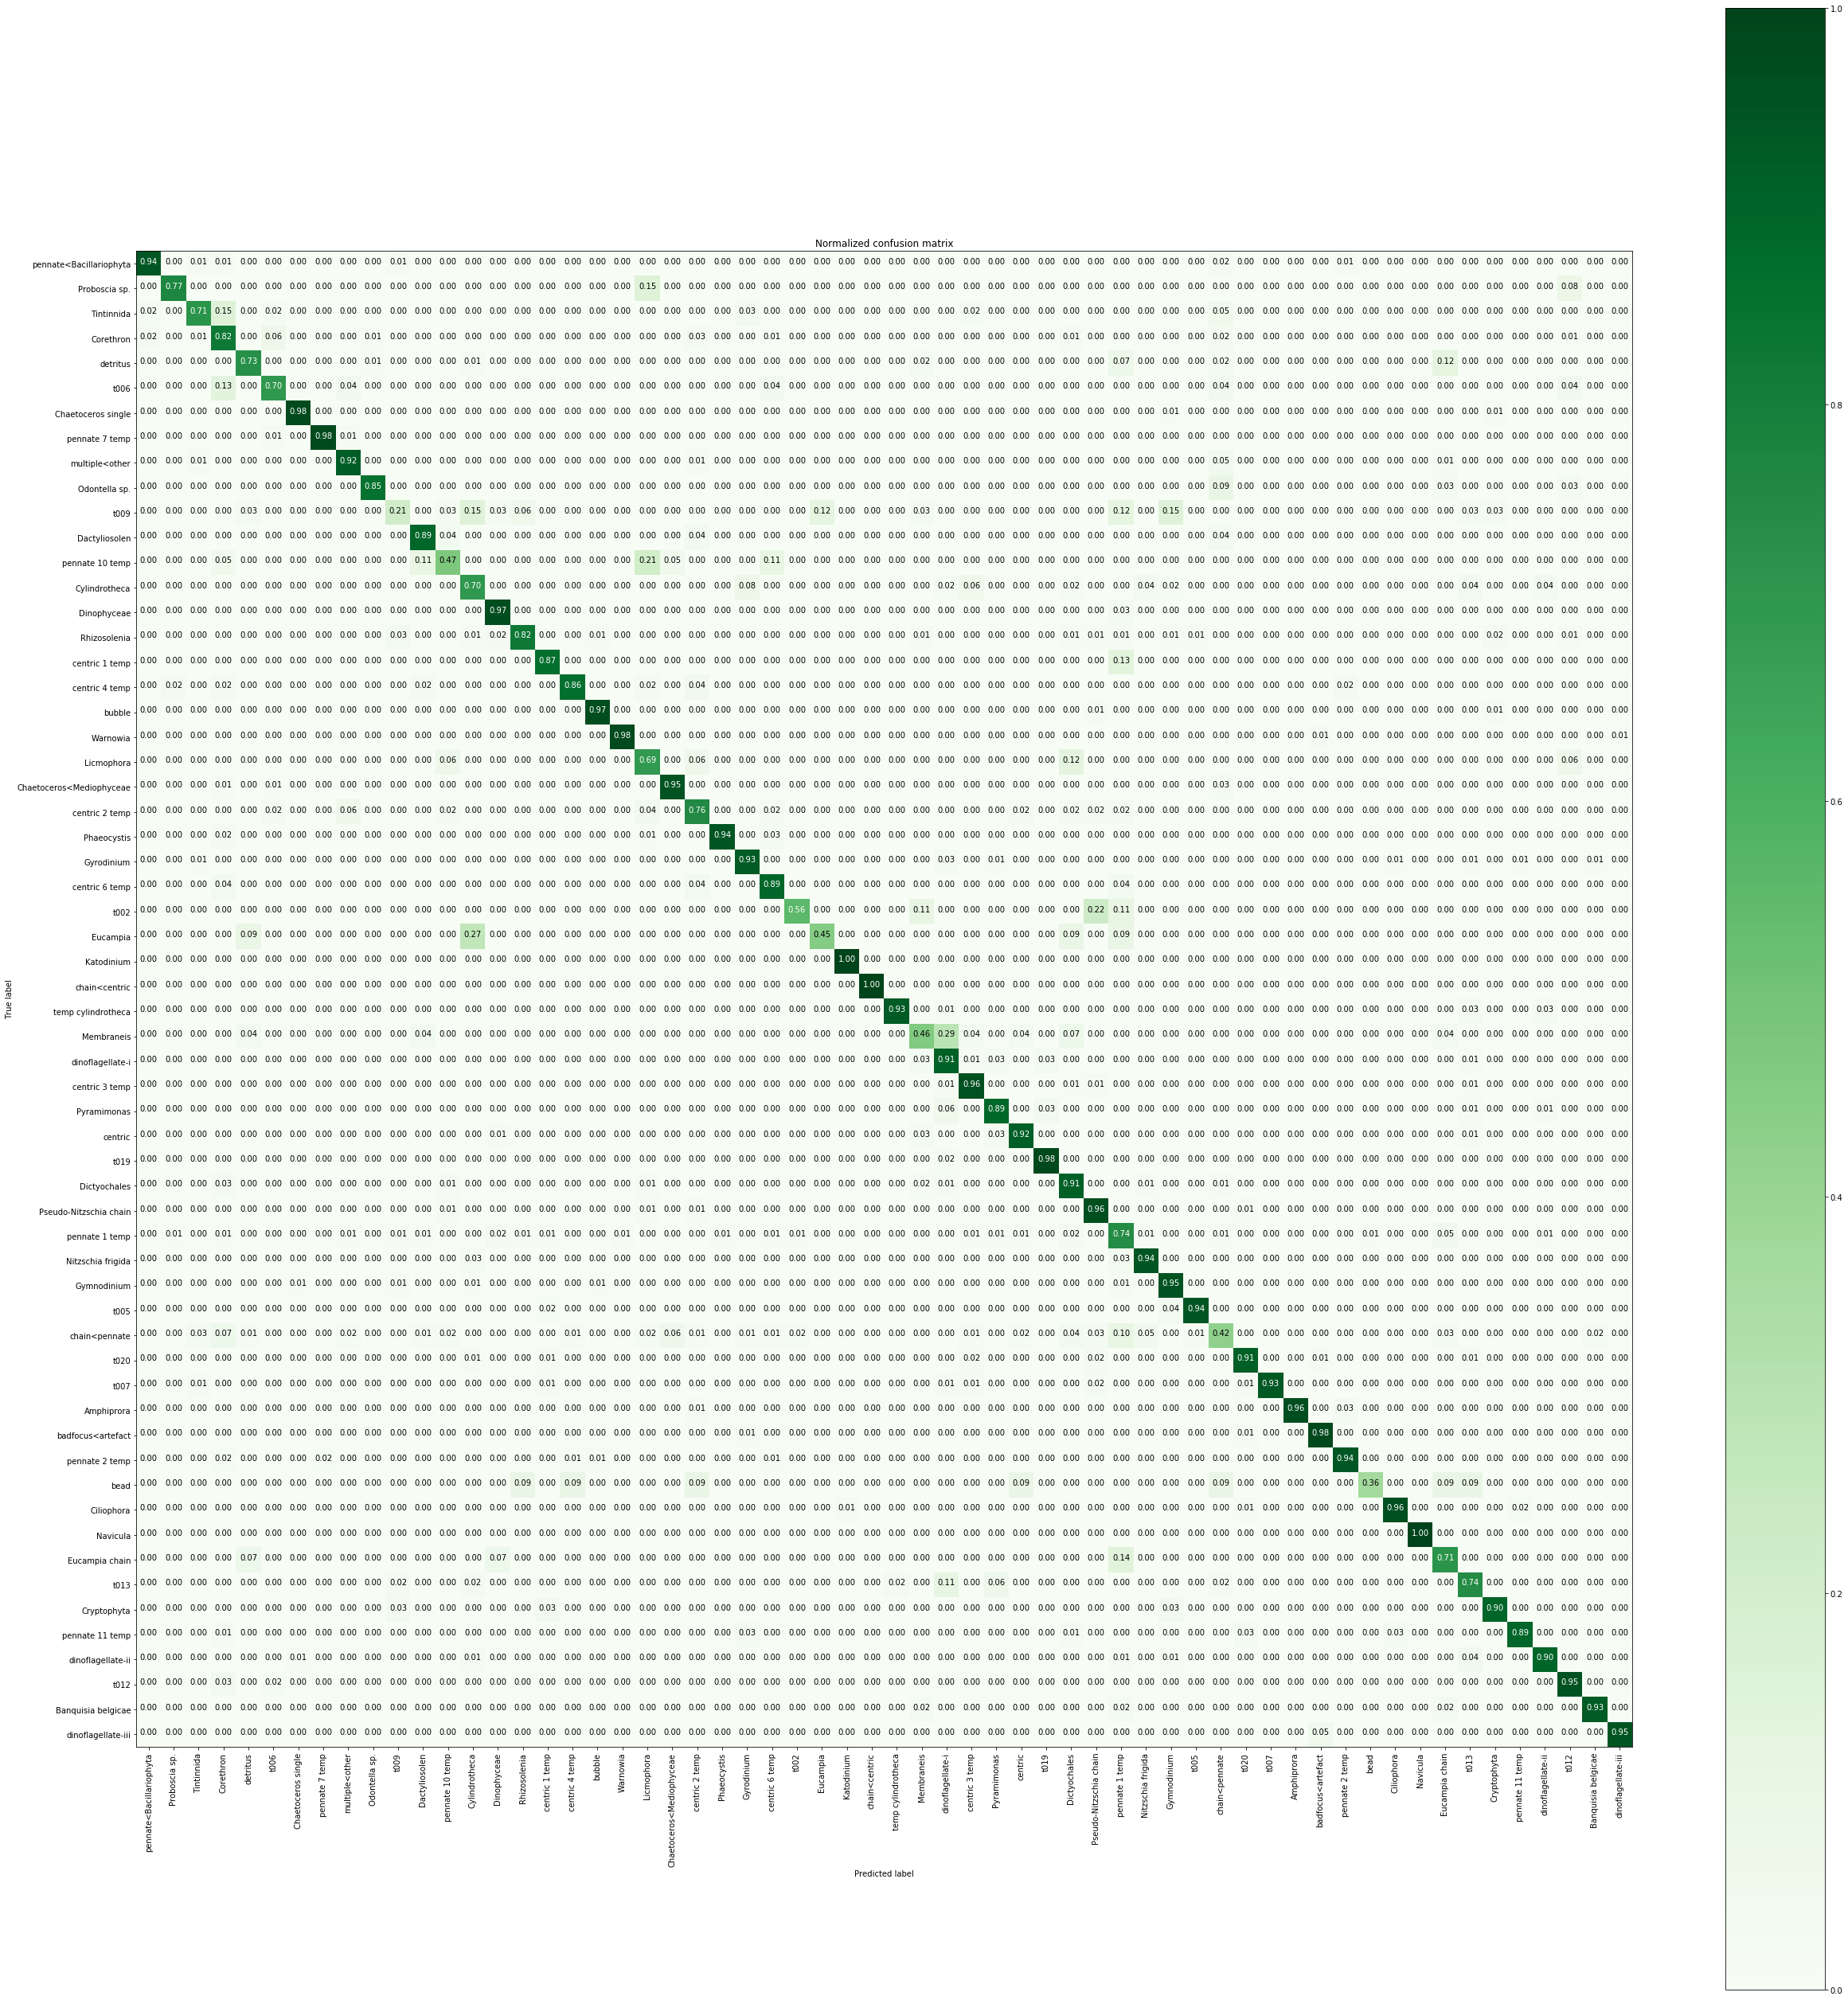

In [67]:
from sklearn.metrics import confusion_matrix
import itertools

Y_val_pred = predictions
Y_val_real = labs
cm = confusion_matrix(Y_val_real, Y_val_pred)
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens')
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')

#plt.savefig("full_model_conf_matrix.png", dpi=300)
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

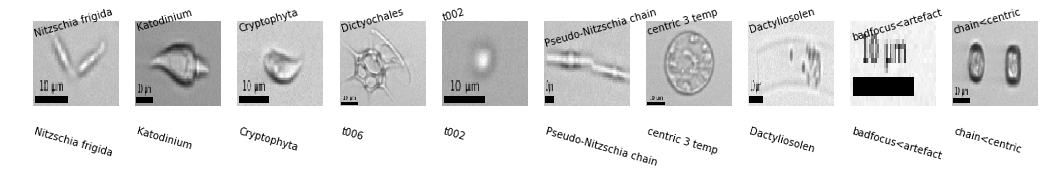

In [68]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_test), size=(10))
predictions = np.argmax(model.predict([X_test[indices], flu_test[indices]]), axis=1)
labs = np.argmax(y_test[indices], axis=1)

for i in range(0, 10):
    ax[i].imshow(X_test[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, id_class_dict[labs[i]], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [69]:
# TODO gauge model confidence by the predicted class

In [71]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu_iteration10.hdf5')

In [72]:
val_img_subset[val_img_subset.object_annotation_status == 'validated'].groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   491
Banquisia belgicae            64
Chaetoceros single           295
Chaetoceros<Mediophyceae     739
Ciliophora                   405
Corethron                    116
Cryptophyta                 1193
Cylindrotheca                443
Dactyliosolen                436
Dictyochales                 167
Dinophyceae                  165
Eucampia                     141
Eucampia chain                97
Gymnodinium                  263
Gyrodinium                   166
Katodinium                   454
Licmophora                   148
Membraneis                   256
Navicula                     353
Nitzschia frigida            834
Odontella sp.                 80
Phaeocystis                 1020
Proboscia sp.                243
Pseudo-Nitzschia chain      1045
Pyramimonas                  897
Rhizosolenia                 140
Tintinnida                    45
Warnowia                      53
badfocus<artefact           1194
bead            

In [73]:
# go through each initial class and find out accuracy of how often that is in the correct merged class

In [74]:
class_id_dict

{'Amphiprora': 0,
 'Banquisia belgicae': 1,
 'Chaetoceros single': 2,
 'Chaetoceros<Mediophyceae': 3,
 'Ciliophora': 4,
 'Corethron': 5,
 'Cryptophyta': 6,
 'Cylindrotheca': 7,
 'Dactyliosolen': 8,
 'Dictyochales': 9,
 'Dinophyceae': 10,
 'Eucampia': 11,
 'Eucampia chain': 12,
 'Gymnodinium': 13,
 'Gyrodinium': 14,
 'Katodinium': 15,
 'Licmophora': 16,
 'Membraneis': 17,
 'Navicula': 18,
 'Nitzschia frigida': 19,
 'Odontella sp.': 20,
 'Phaeocystis': 21,
 'Proboscia sp.': 22,
 'Pseudo-Nitzschia chain': 23,
 'Pyramimonas': 24,
 'Rhizosolenia': 25,
 'Tintinnida': 26,
 'Warnowia': 27,
 'badfocus<artefact': 28,
 'bead': 29,
 'bubble': 30,
 'centric': 31,
 'centric 1 temp': 32,
 'centric 2 temp': 33,
 'centric 3 temp': 34,
 'centric 4 temp': 35,
 'centric 6 temp': 36,
 'chain<centric': 37,
 'chain<pennate': 38,
 'detritus': 39,
 'dinoflagellate-i': 40,
 'dinoflagellate-ii': 41,
 'dinoflagellate-iii': 42,
 'multiple<other': 43,
 'pennate 1 temp': 44,
 'pennate 10 temp': 45,
 'pennate 11 temp

#### finally running these on proper data and not including train

In [75]:
len(val_img_subset)

25275

In [76]:
val_img_subset = val_img_subset.reset_index()

In [77]:
val_img_subset = val_img_subset.set_index('object_id')
#img_md_subset.update(new_val.set_index('object_id')[['object_annotation_status', 'object_annotation_category']])
# this is effectively an upsert operation like in SQL
val_img_subset_only_test = val_img_subset[val_img_subset.index.isin(ids_test)]
val_img_subset_only_test = val_img_subset_only_test.reset_index()
val_img_subset = val_img_subset.reset_index()

In [78]:
len(val_img_subset_only_test)

4575

In [79]:
val_img_subset_only_test.groupby('object_annotation_category')['object_id'].nunique()

object_annotation_category
Amphiprora                   98
Banquisia belgicae           13
Chaetoceros single           59
Chaetoceros<Mediophyceae    140
Ciliophora                   81
Corethron                    23
Cryptophyta                 140
Cylindrotheca                89
Dactyliosolen                87
Dictyochales                 33
Dinophyceae                  33
Eucampia                     28
Eucampia chain               19
Gymnodinium                  53
Gyrodinium                   33
Katodinium                   91
Licmophora                   30
Membraneis                   51
Navicula                     71
Nitzschia frigida           140
Odontella sp.                16
Phaeocystis                 140
Proboscia sp.                49
Pseudo-Nitzschia chain      140
Pyramimonas                 140
Rhizosolenia                 28
Tintinnida                    9
Warnowia                     11
badfocus<artefact           140
bead                        107
bubble       

In [80]:
row

object_id                                     D20180222T170115_IFCB116_00246
object_lat                                                          -64.8138
object_lon                                                          -64.0417
object_date                                                         20180222
object_time                                                           170115
object_link                                                              NaN
object_depth_min                                                           0
object_depth_max                                                           0
object_annotation_status                                           validated
object_annotation_person_name                              Schuyler Nardelli
object_annotation_person_email                   nardelli@marine.rutgers.edu
object_annotation_date                                              20201202
object_annotation_time                                                230439

In [81]:
from tensorflow.keras.preprocessing import image
import numpy as np

names = []
accs = []
counts = []
all_labs = []
all_preds = []

for name, group in val_img_subset_only_test.groupby('object_annotation_category')['object_id']:
    #print('*** ',name)    
    images = []
    labels = []
    flus = []

    for fn in group:

        # TODO need to think about optimal size and that size actually corresponds to class
        # maybe add blackspace instead of interpolating because it is changing the morphology

        img = image.load_img('../../../Data/all_imagery/'+fn+'.png', target_size=(150, 150), color_mode="grayscale")
        images.append(image.img_to_array(img))
        mc = val_img_subset[val_img_subset.object_id == fn].object_annotation_category
        pmt = val_img_subset[val_img_subset.object_id == fn].object_pmt_fluorescence
        peak = val_img_subset[val_img_subset.object_id == fn].object_peak_fluorescence
        labels.append(class_id_dict[mc.values[0]])
        #flus.append([pmt.values[0], peak.values[0]]) 
        flus.append(np.array(val_img_subset[val_img_subset.object_id == fn].iloc[0][val_img_subset.columns.isin(cols_for_training)].values, dtype=np.float64))
        
    images = np.array(images)
    labels = np.array(labels)
    #flus = np.array(flus)

    flus = scaler.transform(flus)
    X_predict = images / 130
    #print('normed mean and std: ', np.mean(X_predict), np.std(X_predict))
    
    predictions = np.argmax(model.predict([X_predict, flus]), axis=1)
    #print(np.count_nonzero(labels==predictions), len(labels))
    #print('accuracy:', np.count_nonzero(labels==predictions)/len(labels))
    names.append(name)
    accs.append(np.count_nonzero(labels==predictions)/len(labels))
    counts.append(len(labels))
    all_labs += list(labels)
    all_preds += list(predictions)
    #print('------')
    
    


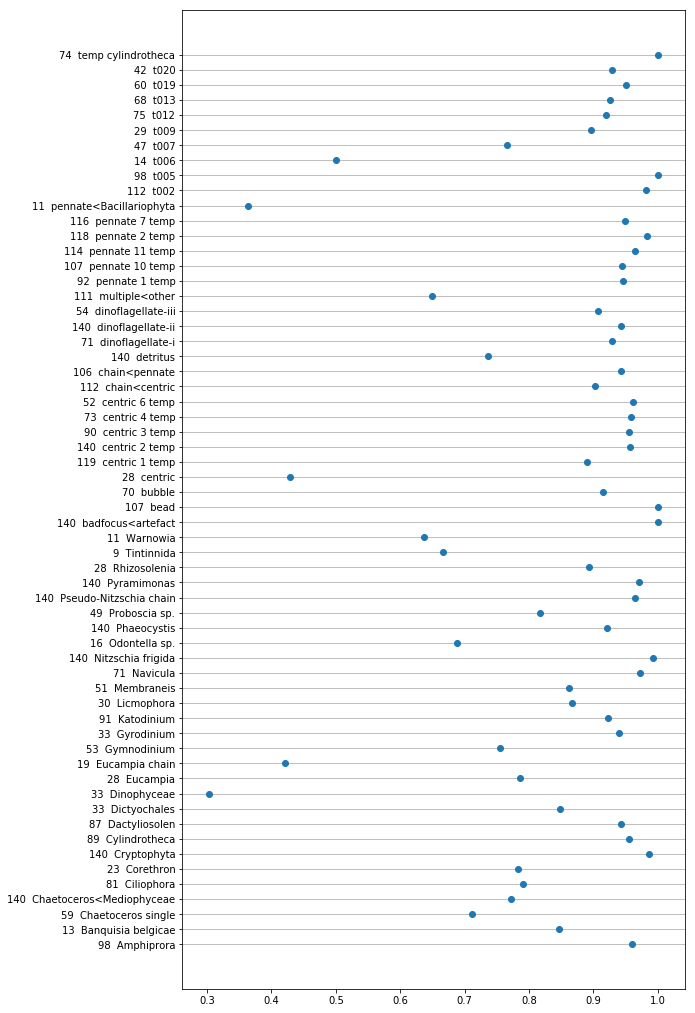

In [82]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(accs, names)
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('individual_class_acc.png', dpi=300)
plt.show()

In [83]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), average='weighted', labels=list(id_class_dict.keys()))

(0.9051851572218814, 0.9029508196721312, 0.9024948694865806, None)

In [84]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(all_labs), np.array(all_preds), 
                                average=None, labels=list(id_class_dict.keys()))

In [85]:
len(list(id_class_dict.keys()))

60

In [86]:
len(precision)

60

In [87]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

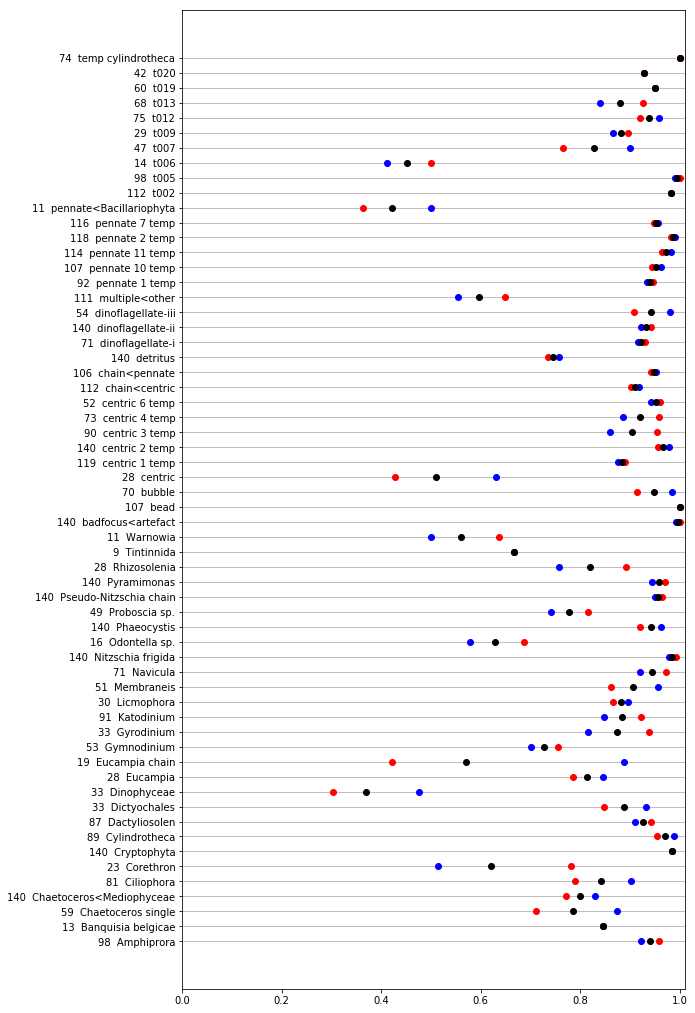

In [88]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('individual_class_acc.png', dpi=300)
plt.show()

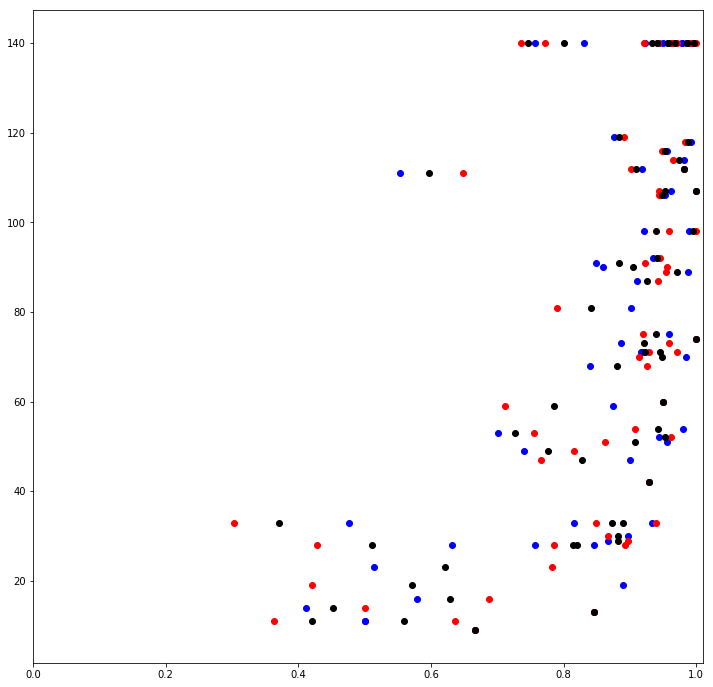

In [89]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(12, 12))
#ax.scatter(accs, counts)
ax.scatter(precision, counts, color='blue')
ax.scatter(recall, counts, color='red')
ax.scatter(fscore, counts, color='black')
#ax.set_yticks(range(0,len(names)))
#ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')
#ax.set_ylim(-10,1500)

# Don't allow the axis to be on top of your data
#ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('count_vs_acc.png', dpi=300)
plt.show()

In [90]:
! pwd

/host/Code/deep_ifcb/python


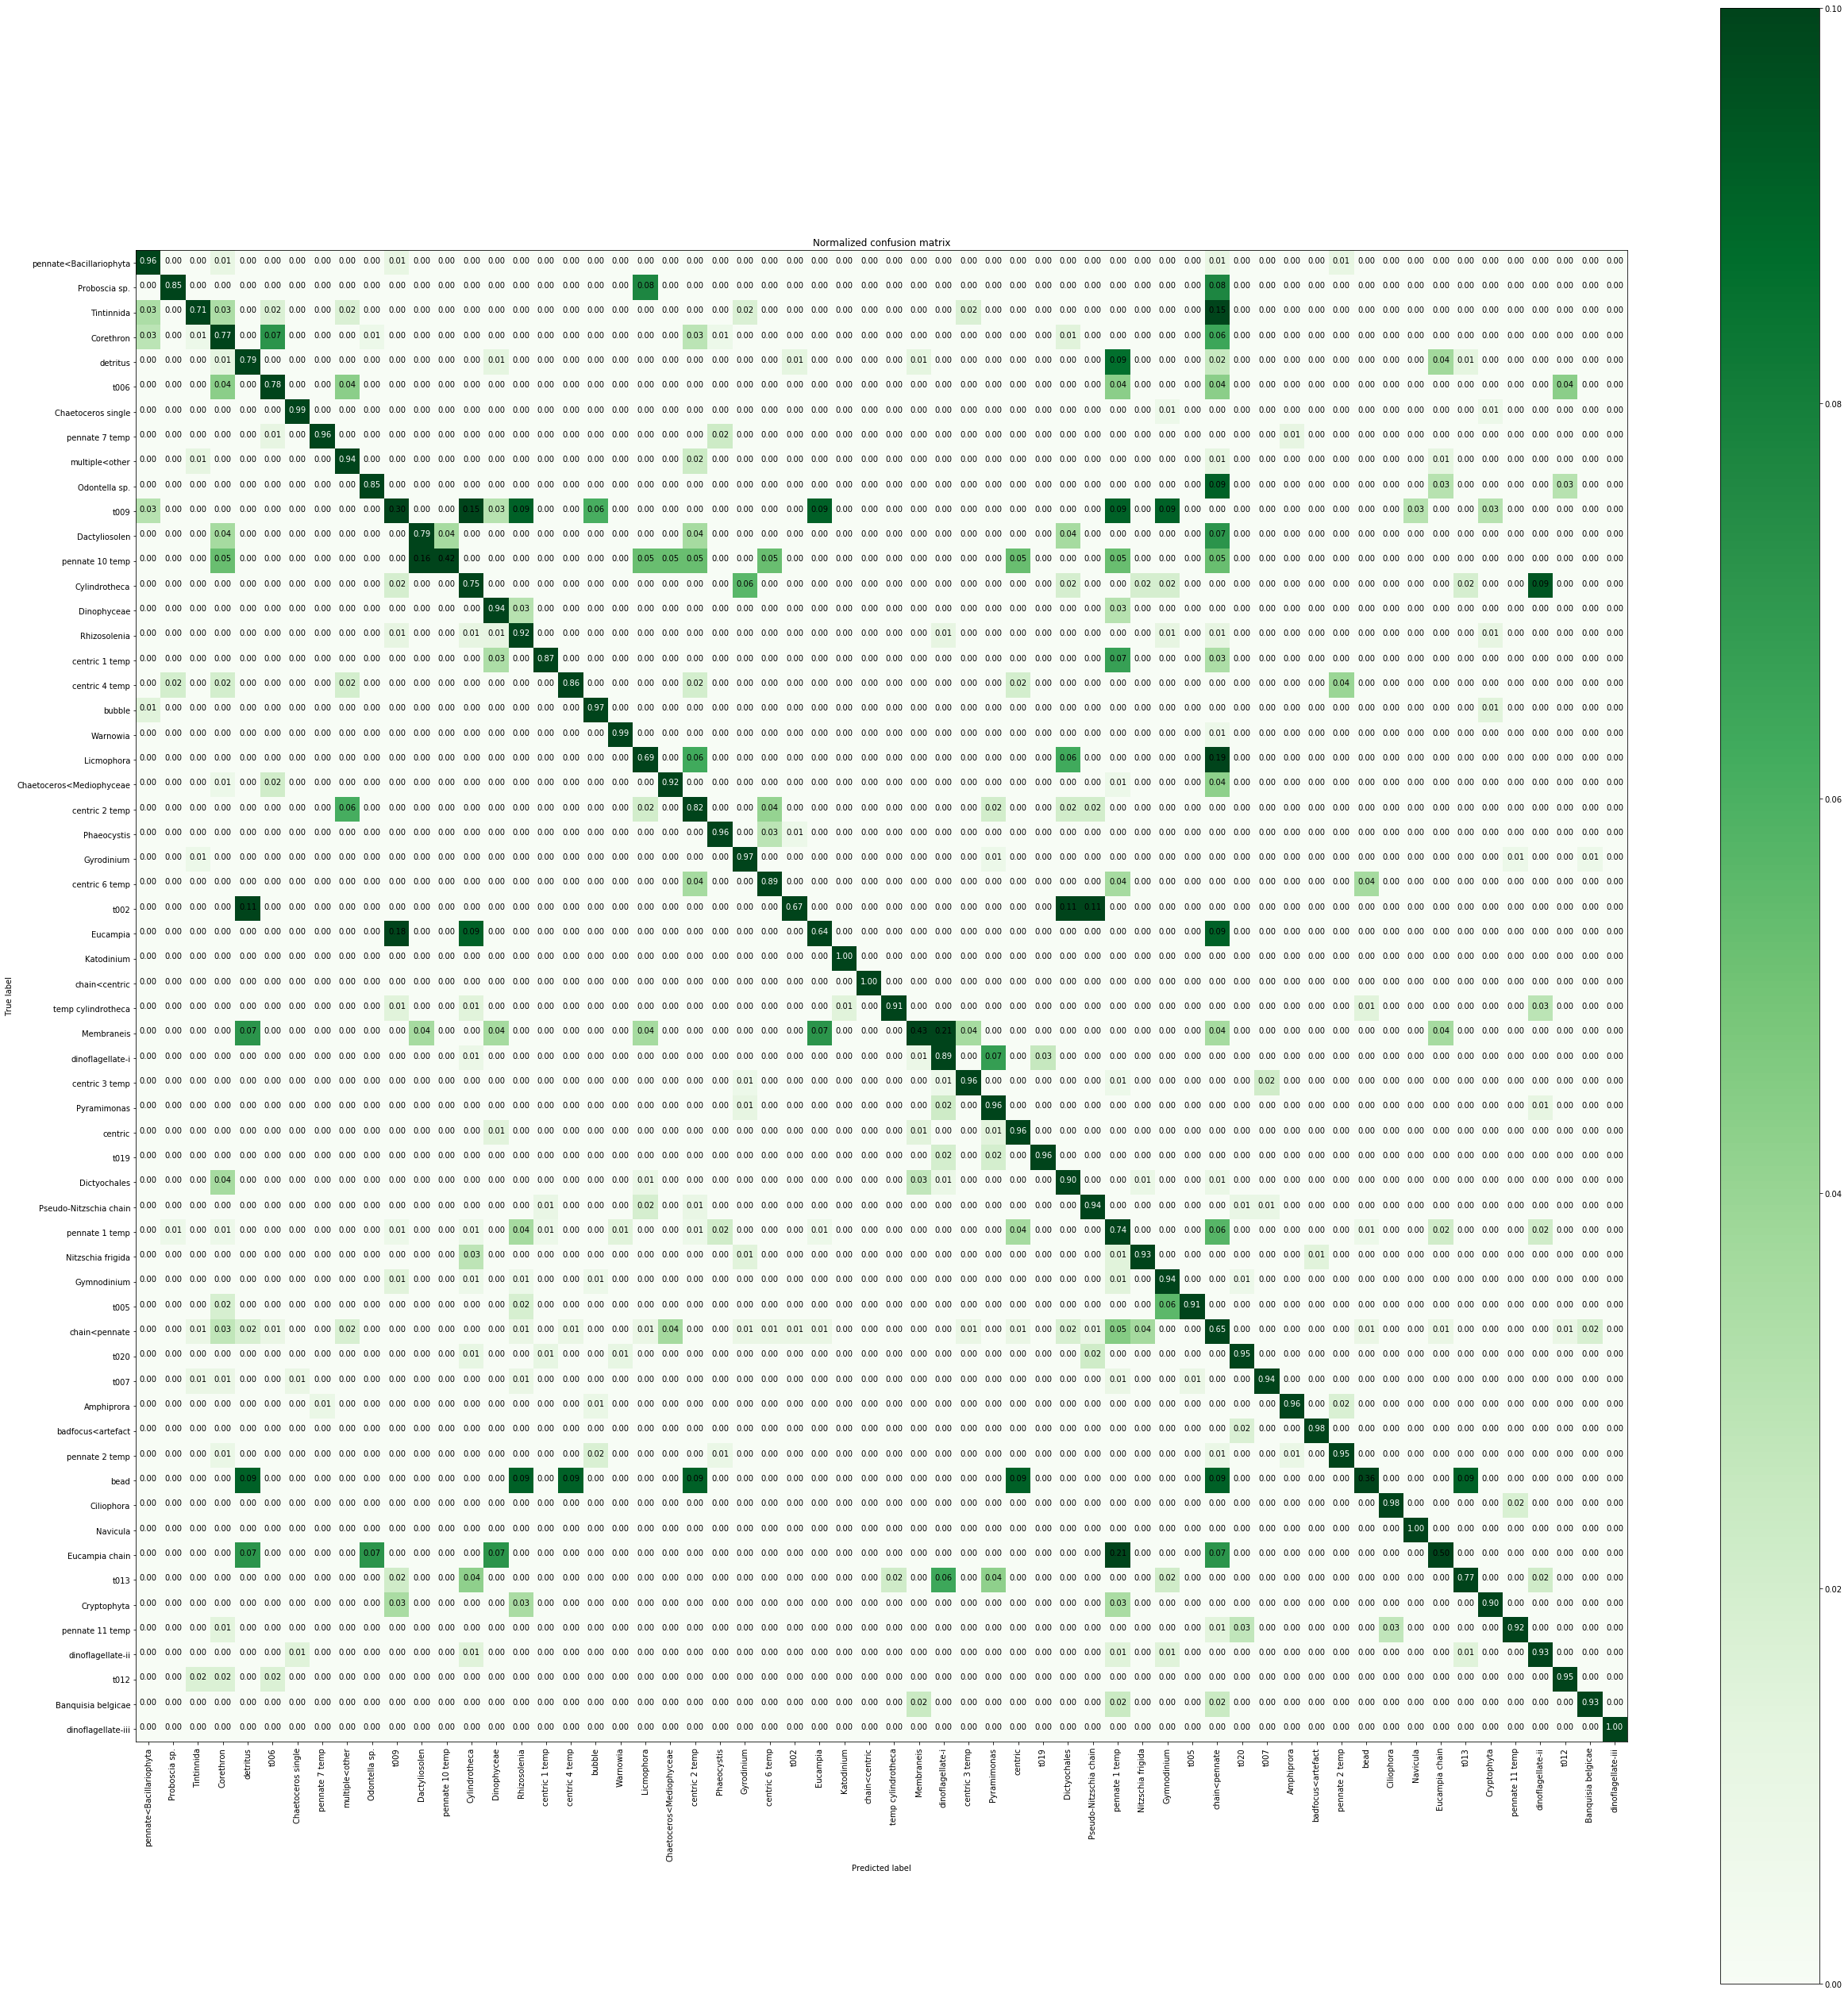

In [91]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(all_labs), np.array(all_preds))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(35,35)) 

plt.imshow(cm, cmap = 'Greens', vmax=0.1)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_unmerged_visible_low_end_large.png', dpi=300)

### Convert the labels to the merged labels

Find the merged class name corresponding to the individual class name it was classified into

In [92]:
merged_labs_truth = []
for lab in all_labs:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs_truth.append(class_names[i])

In [93]:
merged_labs = []
for lab in all_preds:
    for i in range(len(classes)):
        if id_class_dict[lab] in classes[i]: 
            merged_labs.append(class_names[i])


In [94]:
len(all_labs), len(merged_labs_truth), len(merged_labs)

(4575, 4575, 4575)

In [95]:
class_id_list = [[x, i] for i, x in enumerate(class_names)]
class_id_dict = {key: value for (key, value) in class_id_list}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

id_class_dict

{0: 'pennates',
 1: 'centrics',
 2: 'cryptophyta',
 3: 'dinoflagellates',
 4: 'pyramimonas',
 5: 'phaeocystis',
 6: 'dictyochales',
 7: 'ciliophora',
 8: 'tintinnida',
 9: 'unidentified_flagellates',
 10: 'unidentified_living_cells',
 11: 'other'}

In [96]:
merged_labs_id = [class_id_dict[x] for x in merged_labs]
len(merged_labs), len(merged_labs_id)

(4575, 4575)

In [97]:
merged_truth_id = [class_id_dict[x] for x in merged_labs_truth]
len(merged_labs_truth), len(merged_truth_id)

(4575, 4575)

In [98]:
from sklearn.metrics import precision_recall_fscore_support

precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), average='weighted', labels=list(id_class_dict.keys()))

(0.9401655223351769, 0.9398907103825137, 0.9399056347682986, None)

In [99]:
from sklearn.metrics import precision_recall_fscore_support

"""
returns:

precision float (if average is not None) or array of float, shape = [n_unique_labels]
recall float (if average is not None) or array of float, , shape = [n_unique_labels]
fbeta_score float (if average is not None) or array of float, shape = [n_unique_labels]
support None (if average is not None) or array of int, shape = [n_unique_labels]
    The number of occurrences of each label in y_true.
"""

precision, recall, fscore, supports = precision_recall_fscore_support(np.array(merged_truth_id), np.array(merged_labs_id), 
                                average=None, labels=list(id_class_dict.keys()))

In [100]:
names = [id_class_dict[x] for x in list(id_class_dict.keys())]

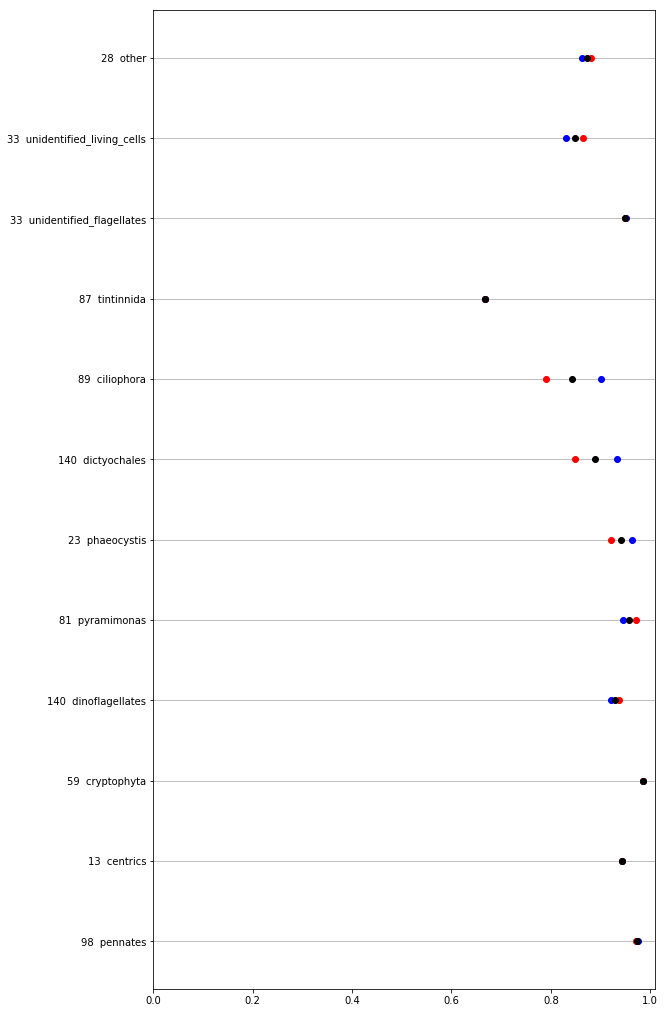

In [101]:
nc = [str(n) + '  ' + m for m,n in zip(names,counts)]

fig, ax = plt.subplots(figsize=(9, 18))
ax.scatter(precision, names, color='blue')
ax.scatter(recall, names, color='red')
ax.scatter(fscore, names, color='black')
ax.set_yticks(range(0,len(names)))
ax.set_yticklabels(nc)
ax.set_xlim(0,1.01)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('merged_class_acc.png', dpi=300)
plt.show()

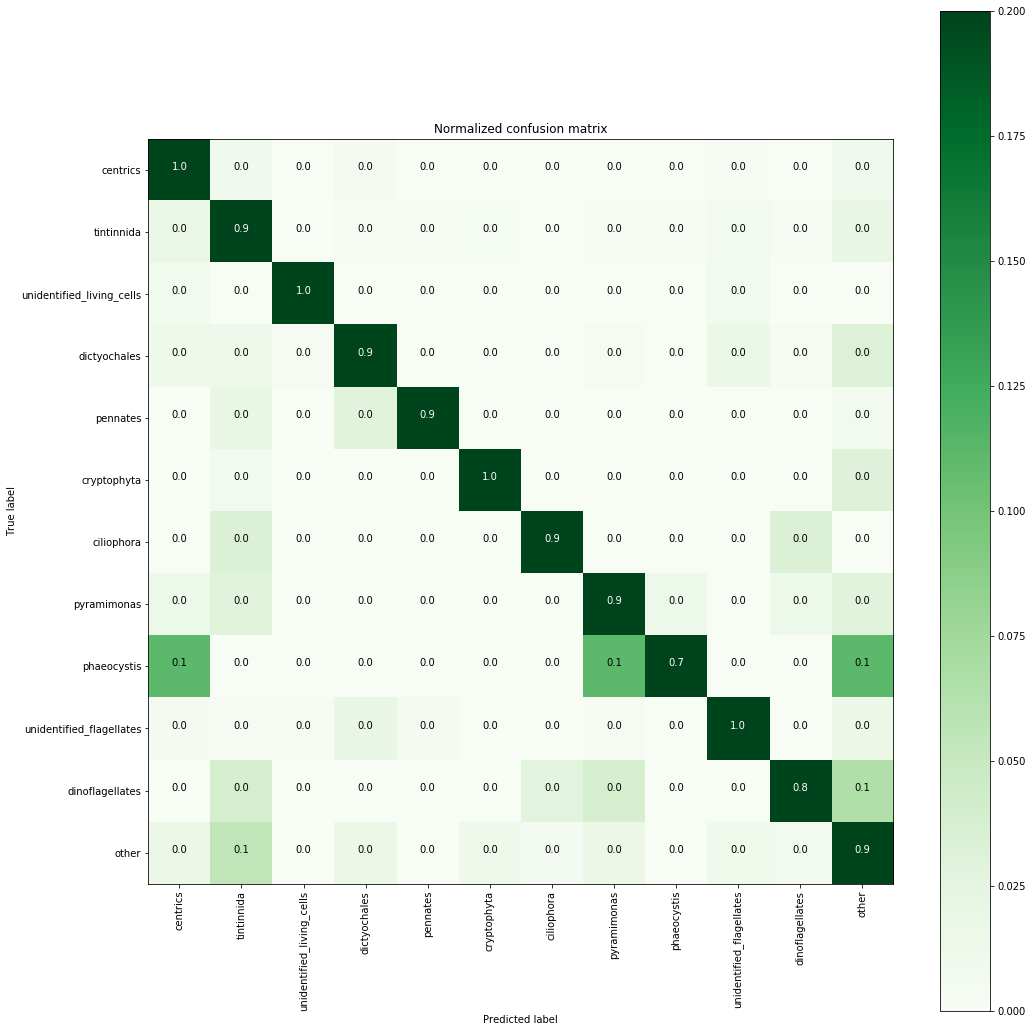

In [102]:
from sklearn.metrics import confusion_matrix
import itertools

num_classes = len(class_id_dict)

cm = confusion_matrix(np.array(merged_labs_id), np.array(merged_truth_id))
cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

# print(cm)
plt.figure(figsize=(15,15)) 

plt.imshow(cm, cmap = 'Greens',vmax=0.2)
plt.title('Normalized confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, list(class_id_dict), rotation=90)
plt.yticks(tick_marks, list(class_id_dict))

fmt = '.1f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
#plt.axis('off')
#plt.grid(b=None, which='major', axis='both')

plt.savefig('conf_matrix_medium_merged.png', dpi=300)